# EDA

## Im ersten Abschnitt sollen fehlende Daten identifiert werden und die Daten im allgemeinen aufbereitet werden.

In [1]:
# Import der entsprechenden Pakete
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [3]:
df.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

#### -> Keine leeren Datensätze vorhanden

In [23]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [24]:
# Weitere Analyse Möglichkeit (Empfohlen in der html-Datei anzusehen)
profile.to_file("Report_Features.html")

array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'explicit'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>]],
      dtype=object)

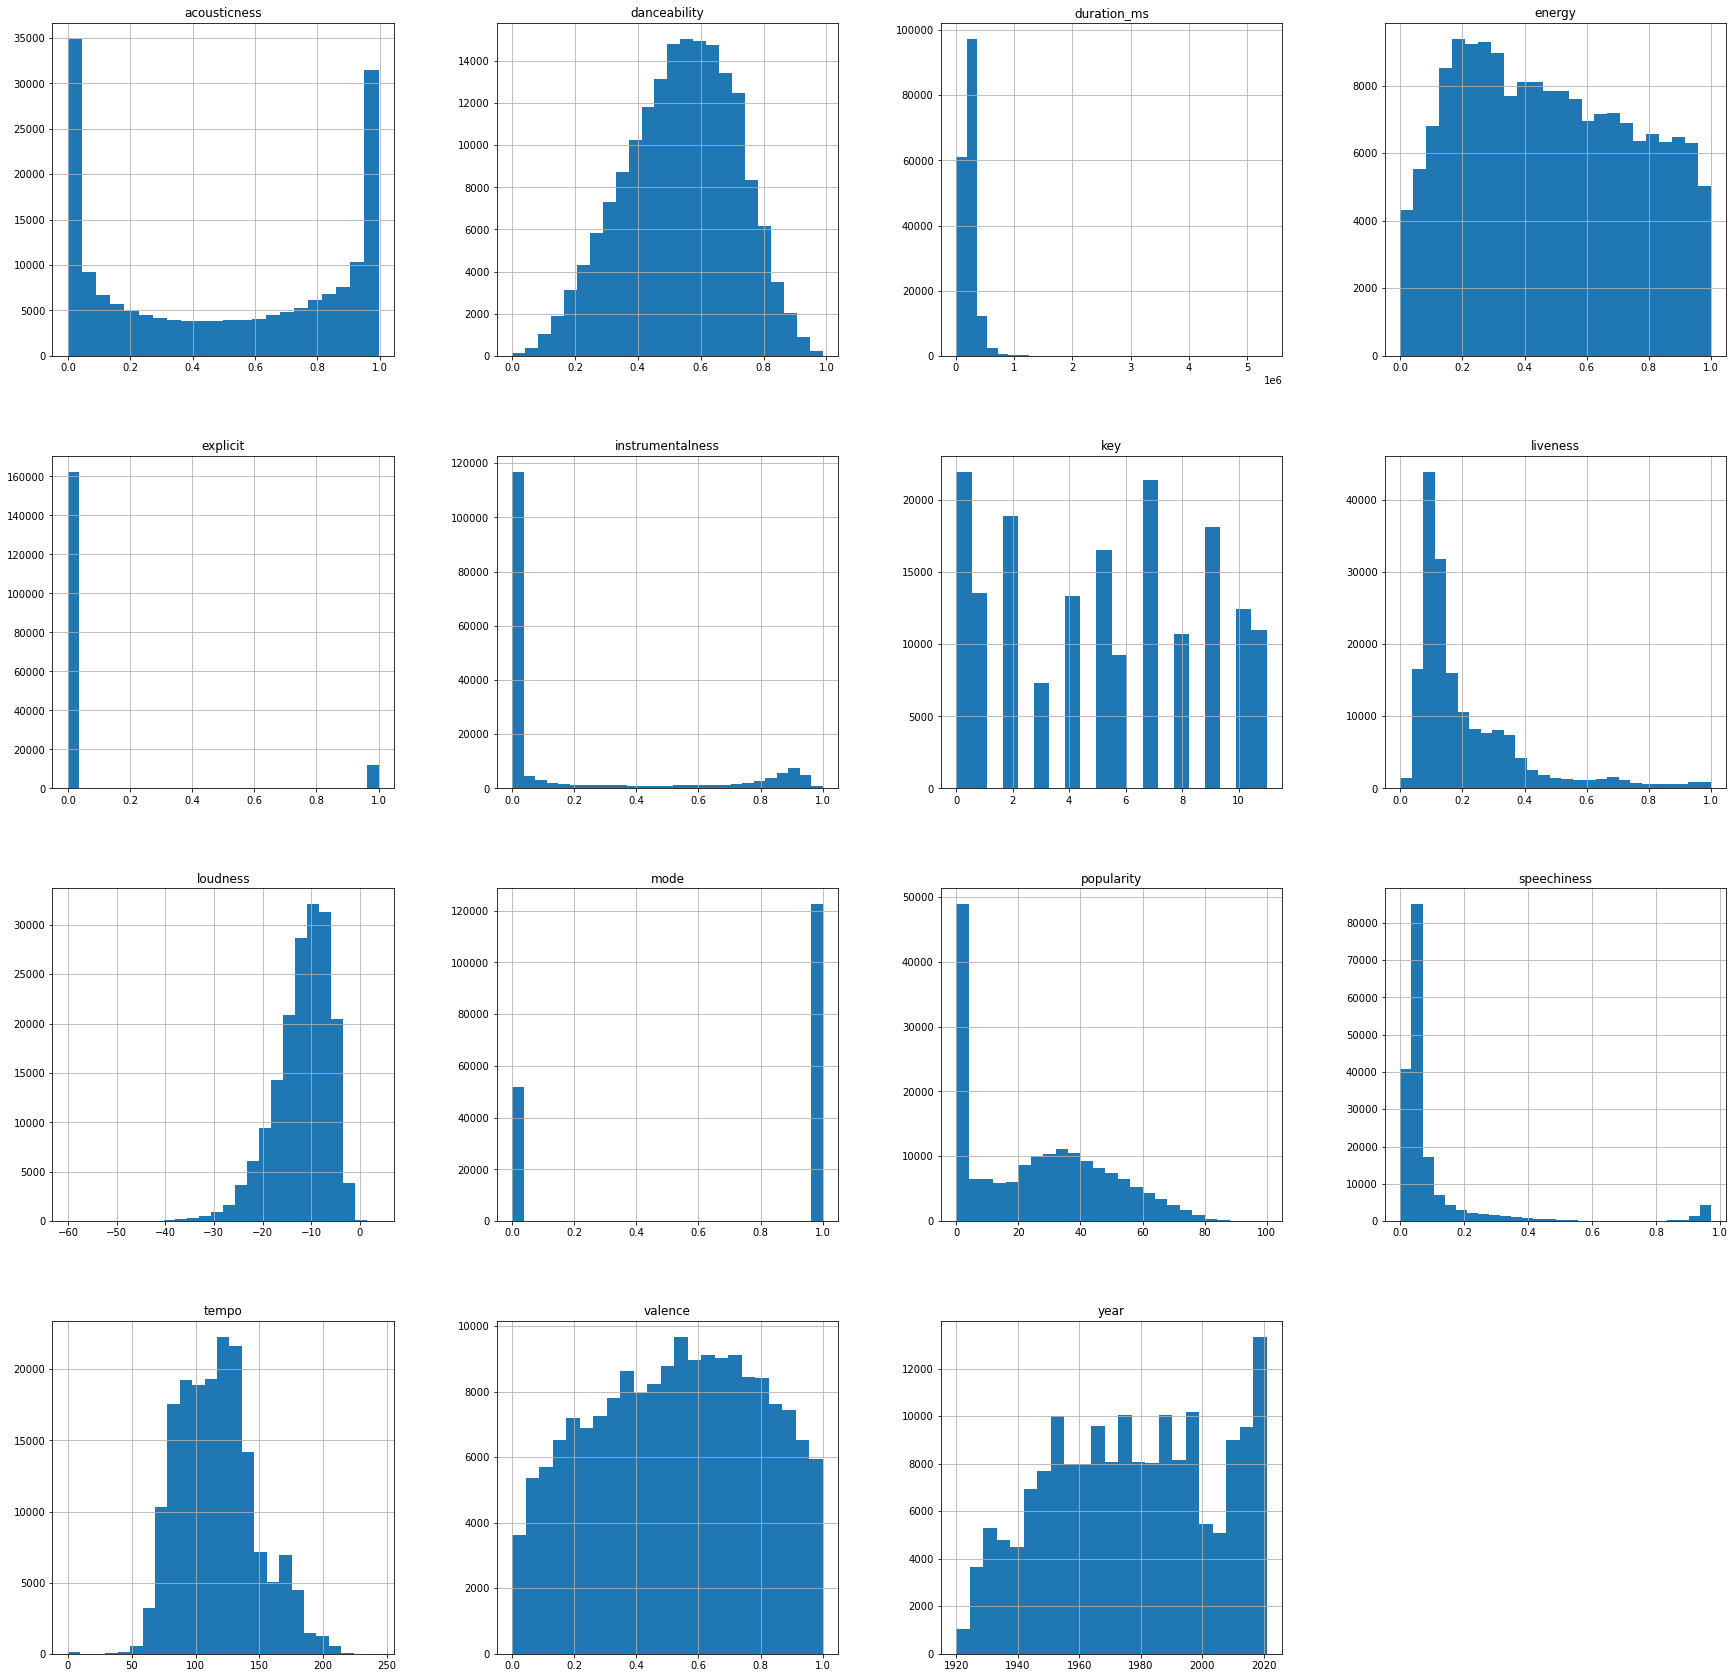

In [84]:
# Erstes Histogramm zur Identifikation von Outliern/Aufälligkeiten
df.hist(figsize=(30, 30), bins='doane')

#### Folgende Features zeigen Auffälligkeiten (aus Pandas_profil und Histogramm): 
    -> Duplikate sind vorhanden
    -> Häufigster Artist im Datenset ist Autor (hohe Häufigkeit, da jedes Kapitel eines Höchbuchs als ein Track zählt). Lösung siehe Speechiness
    -> duration_ms zeigt sehr lange und sehr kurze Songs an
    -> popularity wirkt sehr inbalanced bzw. Long Tail. (Wegend er Wichtigkeit als Zielvariable ans Ende gestellt)
    -> Speechiness zeigt einige Werte >0.8 die führ ein Höhrbuch/-Spiel oder Podcast sprechen
    -> tempo zeigt Werte nahe Null an, muss Untersucht werden da Song ohne einen BPM Auffällig ist
    -> Songs vom gleichen Künstler treten häufig auf (z.b. White Christmas, Winter Wonderland, etc.)

### Duplikate entfernen:

In [20]:
print('Vorher:', len(df))
df = df.drop_duplicates(subset=df.columns.difference(['id', 'popularity']))
print('Nachher:', len(df))

Vorher: 174389
Nachher: 169929


### Untersuchung von duration_ms:

In [21]:
df.sort_values(by='duration_ms',ascending=False).head(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
92981,0.003400,['B-Max'],0.714,5338302,0.801,0,3fQCeki8H8Up3KMIkXU6GD,0.32700,11,0.0887,-7.769,0,"The End of the Year: 2015, Pt. 1 - Continuous ...",0,2015-12-30,0.1080,126.107,0.2840,2015
92953,0.004670,['Various Artists'],0.457,5042185,0.891,0,6rGikpwOv3LXaHWVCYbMNC,0.00109,11,0.2940,-4.596,0,New Year's Eve 2015 Party Hits - Full DJ Party...,0,2014,0.0627,129.516,0.7310,2014
90109,0.040100,['Orion.'],0.359,4892761,0.782,1,3QebJX5G3R5Oc4Ii3AI0u8,0.00003,7,0.1550,-4.529,1,"2021 New Year Mix, Pt. 1",1,2021-01-01,0.1340,149.962,0.1860,2021
37393,0.002570,['Dan McKie'],0.751,4800118,0.807,0,28ci4OQnXnVyOJJjqNTza1,0.51900,7,0.1020,-7.129,1,6 Years of 1980 Recordings - Part 2 - 2010-201...,0,2013-01-28,0.0510,127.006,0.1900,2013
37521,0.001580,['Mark Eteson'],0.317,4792587,0.914,0,3IG9msuvoyDjJlt2DL0ZIn,0.54600,11,0.1290,-6.233,0,Monster Tunes Yearmix 2011 - Mixed by Mark Eteson,0,2011-12-19,0.0489,137.075,0.1080,2011
92593,0.166000,"['Ori Uplift', 'Abora Sound Design']",0.164,4737458,0.491,0,6EP7nxCGKAYaBzDoauqg0i,0.86200,7,0.0923,-10.596,1,Uplifting Only - Symphonic Breakdown Year Mix ...,3,2015-01-14,0.0332,136.121,0.0507,2015
37135,0.000599,['Dj Emma'],0.792,4696690,0.742,0,5EvdM8FjgviSxQCb2FuH1d,0.83800,6,0.0930,-6.899,0,Happy New Year Mix 2009,1,2009-12-25,0.0520,128.001,0.2270,2009
37395,0.000370,['Will Holland'],0.497,4685927,0.912,0,5UYJyyZWpF2sGAM1LTdq7D,0.70400,11,0.3800,-8.405,0,"Enhanced Best of 2010 Year Mix, Part One - Con...",0,2011-01-03,0.0521,134.607,0.0729,2011
141978,0.237000,['Various Artists'],0.305,4675710,0.440,0,6IIPYeO8nbiaOeHzxH9npG,0.77200,0,0.1330,-10.997,1,Curiosities Mixtape (Continuous Mix) [1995-2015],0,2015-02-23,0.0525,76.154,0.0396,2015
93081,0.007790,['Max Popov'],0.617,4590106,0.694,0,0Sg2P5Tqha6mWnLOfUvYQ8,0.86300,4,0.5010,-9.654,0,"The End of the Year: 2016, Pt. 2 - Continuous ...",0,2016-12-26,0.0530,120.713,0.3150,2016


In [5]:
print("Der längste Track im Datensatz:", df['duration_ms'].max())
print("Der kürzeste Track im Datensatz:", df['duration_ms'].min())

Der längste Track im Datensatz: 5338302
Der kürzeste Track im Datensatz: 4937


#### -> Playlist die als einzelne Tracks gelabelt sind

In [22]:
# Entfernt alle Zeilen, dessen Name "Mix" enthält UND der Track länger ist als 20 Min
df_cleaned_duration_1 = df.loc[(~df['name'].str.contains('Mix')) & (df['duration_ms']<1200000)]
print('Gedroppt wurden:', len(df)-len(df_cleaned_duration_1))
# Hier noch nicht sicher ob die UND verkettung wirklich funktioniert

Gedroppt wurden: 4025


In [23]:
# Pause Tracks (deutsch: Pregap) sind kurze Tracks auf alten CDs, die nicht zur Musik zählen 
df_cleaned_duration_1.sort_values(by='duration_ms',ascending=True).head(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
125534,0.955,"['Todd Glass', 'Blake Wexler']",0.0,4937,0.642,1,00TfxQ0wUMHrHoXQsyY1O4,0.000000,7,0.000,-8.020,1,The Shortest Message (2015),0,2018-01-12,0.0,0.0,0.0,2018
62458,0.000,['Sarah Vaughan'],0.0,5108,0.000,0,0hr9kRUi2X4MXc72A4VxG4,0.000000,0,0.000,-60.000,0,Pause Track,0,1949,0.0,0.0,0.0,1949
23004,0.000,['Benny Goodman'],0.0,5991,0.000,0,3IcXTeq9O2dpsSXsDj9naH,0.000000,0,0.000,-60.000,0,Pause Track - Live,0,1938,0.0,0.0,0.0,1938
23073,0.000,['Benny Goodman'],0.0,6362,0.000,0,523qs4UcGlQ6ycdha1VGqs,0.000000,0,0.000,-60.000,0,Pause Track - Live,0,1938,0.0,0.0,0.0,1938
144701,0.000,['Sarah Vaughan'],0.0,6467,0.000,0,3lRVIn6D6EUbvkOgPZAU1H,0.000000,0,0.000,-60.000,0,Pause Track,0,1949,0.0,0.0,0.0,1949
170124,0.514,['Soy Tabues'],0.0,6937,0.689,0,65qnzizFsSBPhkhBxQo1nr,0.000000,6,0.000,-9.504,0,Interlude,0,1999-11-22,0.0,0.0,0.0,1999
158370,0.137,['N.A.T.E. Jones'],0.0,8042,0.279,1,334gn6CIPuCzq5laDm1m0Y,0.000122,10,0.342,-29.832,0,Happy New Years!! (Clear Vision),0,2020-01-01,0.0,0.0,0.0,2020
63260,0.990,"['Sergei Rachmaninoff', 'Arthur Rubinstein', '...",0.0,8853,0.722,0,0MMpXuAkKfU4poBGLwHXUI,0.792000,2,0.447,-7.916,1,"Rhapsody on a Theme of Paganini, Op. 43: Intro...",0,1953,0.0,0.0,0.0,1953
129854,0.990,"['Sergei Rachmaninoff', 'Arthur Rubinstein', '...",0.0,8853,0.694,0,0Yu1hwkNgqwklv8JJlI3Et,0.957000,2,0.470,-9.515,1,"Rhapsody on a Theme of Paganini, Op. 43: Intro...",0,1954,0.0,0.0,0.0,1954
157614,0.650,['Miles Davis'],0.0,9053,0.128,0,2QlykwFFdgDg4xU7oftghh,0.000000,0,0.442,-25.523,1,Introduction to Miles Ahead Medley - Live at M...,0,2002-08-20,0.0,0.0,0.0,2002


In [24]:
# entfernend er Pause Tracks
df_cleaned_duration = df_cleaned_duration_1.loc[~df_cleaned_duration_1['name'].str.contains('Pause Track')]
print('Gedroppt wurden:', len(df_cleaned_duration_1)-len(df_cleaned_duration))                                         

Gedroppt wurden: 4


### Untersuchung von speechness als Höchbücher/Podcast:

In [25]:
df_cleaned_duration.sort_values(by='speechiness',ascending=False).head(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
162011,0.379,"['Harper Lee', 'Eva Mattes']",0.603,361735,0.214,0,4ucGpd15TTUybXsoS5mH9Q,0.000000,1,0.536,-20.355,0,"Wer die Nachtigall stört ..., Kapitel 1",12,1960,0.971,68.686,0.280,1960
25873,0.837,"['Ernest Hemingway', 'Christian Brückner']",0.595,513600,0.305,0,5nnUR41x2t9KvRDKumNcKC,0.000017,11,0.201,-17.821,0,Kapitel 16 - Der alte Mann und das Meer - Erzä...,10,1952,0.970,64.964,0.388,1952
25872,0.831,"['Ernest Hemingway', 'Christian Brückner']",0.606,613240,0.310,0,5c1iGqmxzXvDhiDYO1MU7Q,0.000007,11,0.500,-17.651,0,Kapitel 15 - Der alte Mann und das Meer - Erzä...,10,1952,0.970,76.283,0.437,1952
40598,0.747,['Эрих Мария Ремарк'],0.625,131834,0.178,1,47V5oU29gnqQ86ch6EVMNE,0.000000,11,0.330,-20.560,1,Часть 38.4 & Часть 39.1 - Обратный путь,0,1931,0.970,169.919,0.438,1931
62626,0.415,"['Georgette Heyer', 'Brigitte Carlsen']",0.607,134414,0.208,0,7fanTiM3mNjzTRBd5NAtk9,0.000000,6,0.184,-20.288,1,Kapitel 262 - Die drei Ehen der Grand Sophy,5,1950,0.969,189.418,0.531,1950
143502,0.634,['Tadeusz Dolega Mostowicz'],0.622,134800,0.222,0,5dPsXJwvp79kBA1nI86875,0.000000,6,0.130,-24.030,1,Chapter 9.6 - Doktor Murek zredukowany,0,1936-11-27,0.969,171.084,0.671,1936
77991,0.717,['Tadeusz Dolega Mostowicz'],0.687,164500,0.206,0,2N0OjBQOffxo3LKZKpQznH,0.000000,11,0.163,-21.339,0,Chapter 16.19 - Doktor Murek zredukowany,0,1936-11-27,0.969,75.555,0.667,1936
41619,0.569,['Tadeusz Dolega Mostowicz'],0.602,127600,0.274,0,18kLs5YURgGbjIRfhNM7UE,0.000000,11,0.389,-23.088,0,Chapter 16.9 - Doktor Murek zredukowany,0,1936-11-27,0.969,197.498,0.504,1936
44331,0.614,"['Georgette Heyer', 'Brigitte Carlsen']",0.605,124305,0.158,0,21Sy5S0LdUqKBS4IEnuqtt,0.000000,10,0.255,-20.238,1,Kapitel 174 - Die drei Ehen der Grand Sophy,6,1950,0.969,194.933,0.520,1950
44288,0.547,"['Georgette Heyer', 'Brigitte Carlsen']",0.680,116886,0.251,0,1EGtefPOPQHT2ZC1FBrpCl,0.000000,4,0.146,-16.797,0,Kapitel 220 - Die drei Ehen der Grand Sophy,5,1950,0.969,76.589,0.512,1950


In [26]:
# Droppt alle Werte mit einer speechiness <= 0,66.( 0,66 wird wird von der Spotify API Dokumentation für Höherbücher erkennung empfohlen.)
df_cleaned_spe = df_cleaned_duration.loc[df_cleaned_duration['speechiness']<=0.66]
print('Gedroppt wurden:', len(df_cleaned_duration)-len(df_cleaned_spe))
df_cleaned_spe.sort_values(by='speechiness',ascending=False).head(10)

Gedroppt wurden: 6700


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
22251,0.7840,['Κώστας Μαυρέας'],0.725,104163,0.560,0,4PTsGYi3izUdsqdpoSNTtt,0.000042,7,0.1270,-13.115,0,Ο υπομονητικός,0,1934-01-01,0.660,86.774,0.808,1934
96013,0.9960,"['Nalini Jaywant', 'Harsukh Kikani']",0.723,181923,0.288,0,3ZzMap2NYJKSzsrLcGItgM,0.706000,11,0.1190,-9.212,1,Ek Hato Raja Ne Eh Hati Rani,0,1948-09-20,0.660,114.143,0.830,1948
81368,0.9480,"['22, Little Red, Tangle Eye & Hard Hair', 'Al...",0.789,278082,0.352,0,1DfU2Nmxe1fD65sl1NDpeA,0.000778,8,0.0867,-9.337,1,Early in the Mornin',16,1957,0.660,139.616,0.659,1957
168801,0.0749,['Insane Clown Posse'],0.838,248613,0.747,1,26qVURgWORB9IqDzLlIvOt,0.000000,6,0.2770,-6.608,1,Chicken Huntin',30,1994-01-01,0.659,160.922,0.591,1994
95748,0.9950,['Nadira'],0.814,162199,0.236,0,4VU5AaCNGR8Wi4HlYhCpVR,0.455000,7,0.1160,-10.118,0,Barhe Chalo Barhe Chalo,0,1947-01-01,0.659,117.036,0.804,1947
80030,0.6810,['Эрнест Хемингуэй'],0.737,98203,0.297,1,0HrpG9wgAJb6qYvW55FI63,0.000000,0,0.2750,-18.425,1,"Часть 75.4 & Часть 76.1 - За рекой, в тени дер...",0,1950,0.659,126.207,0.522,1950
111236,0.8850,['Charlie Chaplin'],0.721,222867,0.383,0,3GFxJFX4CcJ7SiQS0D7NCT,0.000000,2,0.5030,-8.429,1,"Final Speech (From ""El Gran Dictador"")",0,1940,0.659,124.404,0.629,1940
3866,0.8850,['Charlie Chaplin'],0.721,222867,0.383,0,5HjcDXSfMbBmG4x04wELjK,0.000000,2,0.5030,-8.429,1,"Final Speech (From ""The Great Dictator"")",24,1940,0.659,124.404,0.629,1940
3872,0.8850,['Charlie Chaplin'],0.721,222867,0.383,0,3sGNjqsVvPslYzC9ngl64g,0.000000,2,0.5030,-8.429,1,"Final Speech - From ""The Great Dictator""",19,1940,0.659,124.404,0.629,1940
3798,0.7900,"['Harold Arlen', 'E.Y. Harburg', 'Roger Edens']",0.866,36840,0.213,0,52Mdso1x4Km9KV2Hw853G5,0.000033,3,0.1770,-22.712,1,Optimistic Voices - Rehearsal Demo,13,1939-08-25,0.658,116.712,0.931,1939


### Untersuchung von tempo = 0, da unrealistisch dass Lied BPM von 0 besitzt:

In [ ]:
print("Der Track mit dem höchsten Tempo im Datensatz:", df['tempo'].max())
print("Der Track mit dem niedrigsten Tempo im Datensatz:", df['tempo'].min())

In [27]:
df_cleaned_spe.sort_values(by='tempo',ascending=True).head(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
47888,0.404000,['Jimi Hendrix'],0.0,61773,0.391000,0,3q3gK9I4mj03565IGtVA0d,0.932000,6,0.0603,-20.962,1,"Moon, Turn the Tides...Gently Gently Away",38,1968-10-25,0.0,0.0,0.0,1968
162847,0.945000,"['Georges Bizet', 'Maria Callas', 'Nicolai Ged...",0.0,55693,0.172000,0,0q0r8JVp4dPZBbmBUsqsgO,0.000083,3,0.8500,-21.578,1,"Carmen (1997 - Remaster), Act I: Quels regarde...",24,1964,0.0,0.0,0.0,1964
62366,0.000000,['Future Rapper'],0.0,420000,0.000000,0,0Rd7eiAZGayLT8TmrVpQzG,0.000000,0,0.0000,-60.000,0,StaggerLee Has His Day at the Beach,0,1949-02-17,0.0,0.0,0.0,1949
91339,0.499000,['Mousecop'],0.0,320807,0.130000,0,5VawWCkff6tCMfazuok6vB,0.959000,7,0.0481,-12.922,1,Un Garage a Ovnis,0,2013-10-17,0.0,0.0,0.0,2013
38892,0.394000,['High Altitude Samples'],0.0,160003,0.001480,0,129ldjjvnFfA7Ygc8ktYnh,1.000000,5,0.1110,-31.839,1,Soft Brown Noise,77,2018-11-15,0.0,0.0,0.0,2018
165526,0.018400,['Steve Miller Band'],0.0,57467,0.000028,0,27AyeOoNoGue7zRyH4CR1I,0.206000,1,0.1090,-21.825,1,Electro Lux Imbroglio,21,1977-01-01,0.0,0.0,0.0,1977
157614,0.650000,['Miles Davis'],0.0,9053,0.128000,0,2QlykwFFdgDg4xU7oftghh,0.000000,0,0.4420,-25.523,1,Introduction to Miles Ahead Medley - Live at M...,0,2002-08-20,0.0,0.0,0.0,2002
125534,0.955000,"['Todd Glass', 'Blake Wexler']",0.0,4937,0.642000,1,00TfxQ0wUMHrHoXQsyY1O4,0.000000,7,0.0000,-8.020,1,The Shortest Message (2015),0,2018-01-12,0.0,0.0,0.0,2018
22628,0.000047,['Apocolothoth'],0.0,152476,0.114000,0,050FXMyCrQJG01AT55Jvk1,0.998000,0,0.5780,3.855,0,Sold,0,1936-05-27,0.0,0.0,0.0,1936
24705,0.986000,"['George Frideric Handel', 'The Liverpool Phil...",0.0,38600,0.073200,0,1GSbNqhEjZdE08fbcO2OeG,0.082700,9,0.1600,-21.423,1,"Messiah, HWV 56, Pt. 3: Behold, I tell you a m...",0,1946,0.0,0.0,0.0,1946


In [28]:
# Entfernt werden alle Tracks mit einem Tempo UND einer speechiness = 0 (Scheint fehlende Daten zu sein)
df_cleaned_tempo = df_cleaned_spe.loc[(df_cleaned_spe['speechiness']>0) & (df_cleaned_spe['tempo']>0)]
print('Gedroppt wurden:', len(df_cleaned_spe)-len(df_cleaned_tempo))

Gedroppt wurden: 112


In [36]:
# Datenfehler bestätigt sich, da nach Tempo 0 nur noch Leider mit minimalem Tempo von 30,946 vorhanden sind
df_cleaned_tempo.sort_values(by='tempo',ascending=True).head(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
83065,0.855,['Lenny Welch'],0.4220,173960,0.1580,0,49TODnGb6Y2wup2Unp2JWC,0.000000,8,0.1170,-12.790,1,Since I Fell for You,20,1965,0.0277,30.946,0.3080,1965
83202,0.927,"['Ennio Morricone', 'Itzhak Perlman', 'John Wi...",0.1890,197307,0.1600,0,7BHX4FX2hfw14gnvcQVJPO,0.421000,10,0.1110,-19.862,1,"Love Theme (From ""Cinema Paradiso"")",38,1966,0.0427,31.988,0.0749,1966
62363,0.979,"['Manuel de Falla', 'Isaac Stern']",0.4910,71707,0.2290,0,0QxNgO93HRmZT4JvcMl6Mp,0.618000,9,0.0874,-11.997,0,Suite populaire espagnole: IV. Polo,0,1949,0.0343,32.941,0.0992,1949
70630,0.969,['Danny Elfman'],0.0640,155200,0.0404,0,4mHz1B1A0p1ItAxea0zhff,0.918000,0,0.0785,-26.424,1,Storytime,41,1990-01-01,0.0420,33.334,0.0318,1990
160655,0.940,"['Carlo Pepoli', 'Vincenzo Bellini', 'Coro Del...",0.3340,146373,0.3500,0,2LNuvD4kj4OQi0ugAUT9oh,0.055700,10,0.1490,-14.852,1,"I Puritani (1986 - Remaster), Act I, Scena pri...",0,1953,0.0533,33.391,0.2200,1953
59917,0.735,"['Johann Sebastian Bach', 'Albert Schweitzer']",0.0796,330636,0.2700,0,6cnAsKhXq5X1BFiDTdSp4W,0.827000,7,0.1640,-12.306,1,Prelude and Fugue in G Major BWV 541: II. Fugue,0,1933,0.0384,33.944,0.1760,1933
27639,0.456,['Yusef Lateef'],0.2660,194693,0.3300,0,6oarR9NsZJOlYxDi17S9iS,0.000048,7,0.1830,-13.088,0,Ching Miau - Rudy Van Gelder Remaster,30,1961,0.0377,34.496,0.3130,1961
172484,0.987,['The DC Project'],0.5020,19827,0.0105,0,2Spc7kDhuakgDpTCqJO1Nr,0.883000,10,0.1200,-16.173,0,12 Midnight,0,2006-01-09,0.0753,34.631,0.0000,2006
11819,0.678,['Pink Floyd'],0.1830,93356,0.1620,0,7FCiDC7ojdm19CJePq6QAe,0.022000,4,0.1190,-22.191,0,Vera,52,1979-11-30,0.1510,34.717,0.0839,1979
8294,0.971,['Nat King Cole'],0.3760,120400,0.1520,0,22hVlcdlfqmtOuEih4hZcH,0.000099,8,0.1050,-18.377,1,Away In A Manger,53,1962,0.0326,34.765,0.2530,1962


In [29]:
print('Anzahl Tracks im gecleanten Datensatz:', len(df_cleaned_tempo))
print('Insgesamt gedroppt wurden:', len(df)-len(df_cleaned_tempo))

Anzahl Tracks im gecleanten Datensatz: 159088
Insgesamt gedroppt wurden: 10841


array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'explicit'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>]],
      dtype=object)

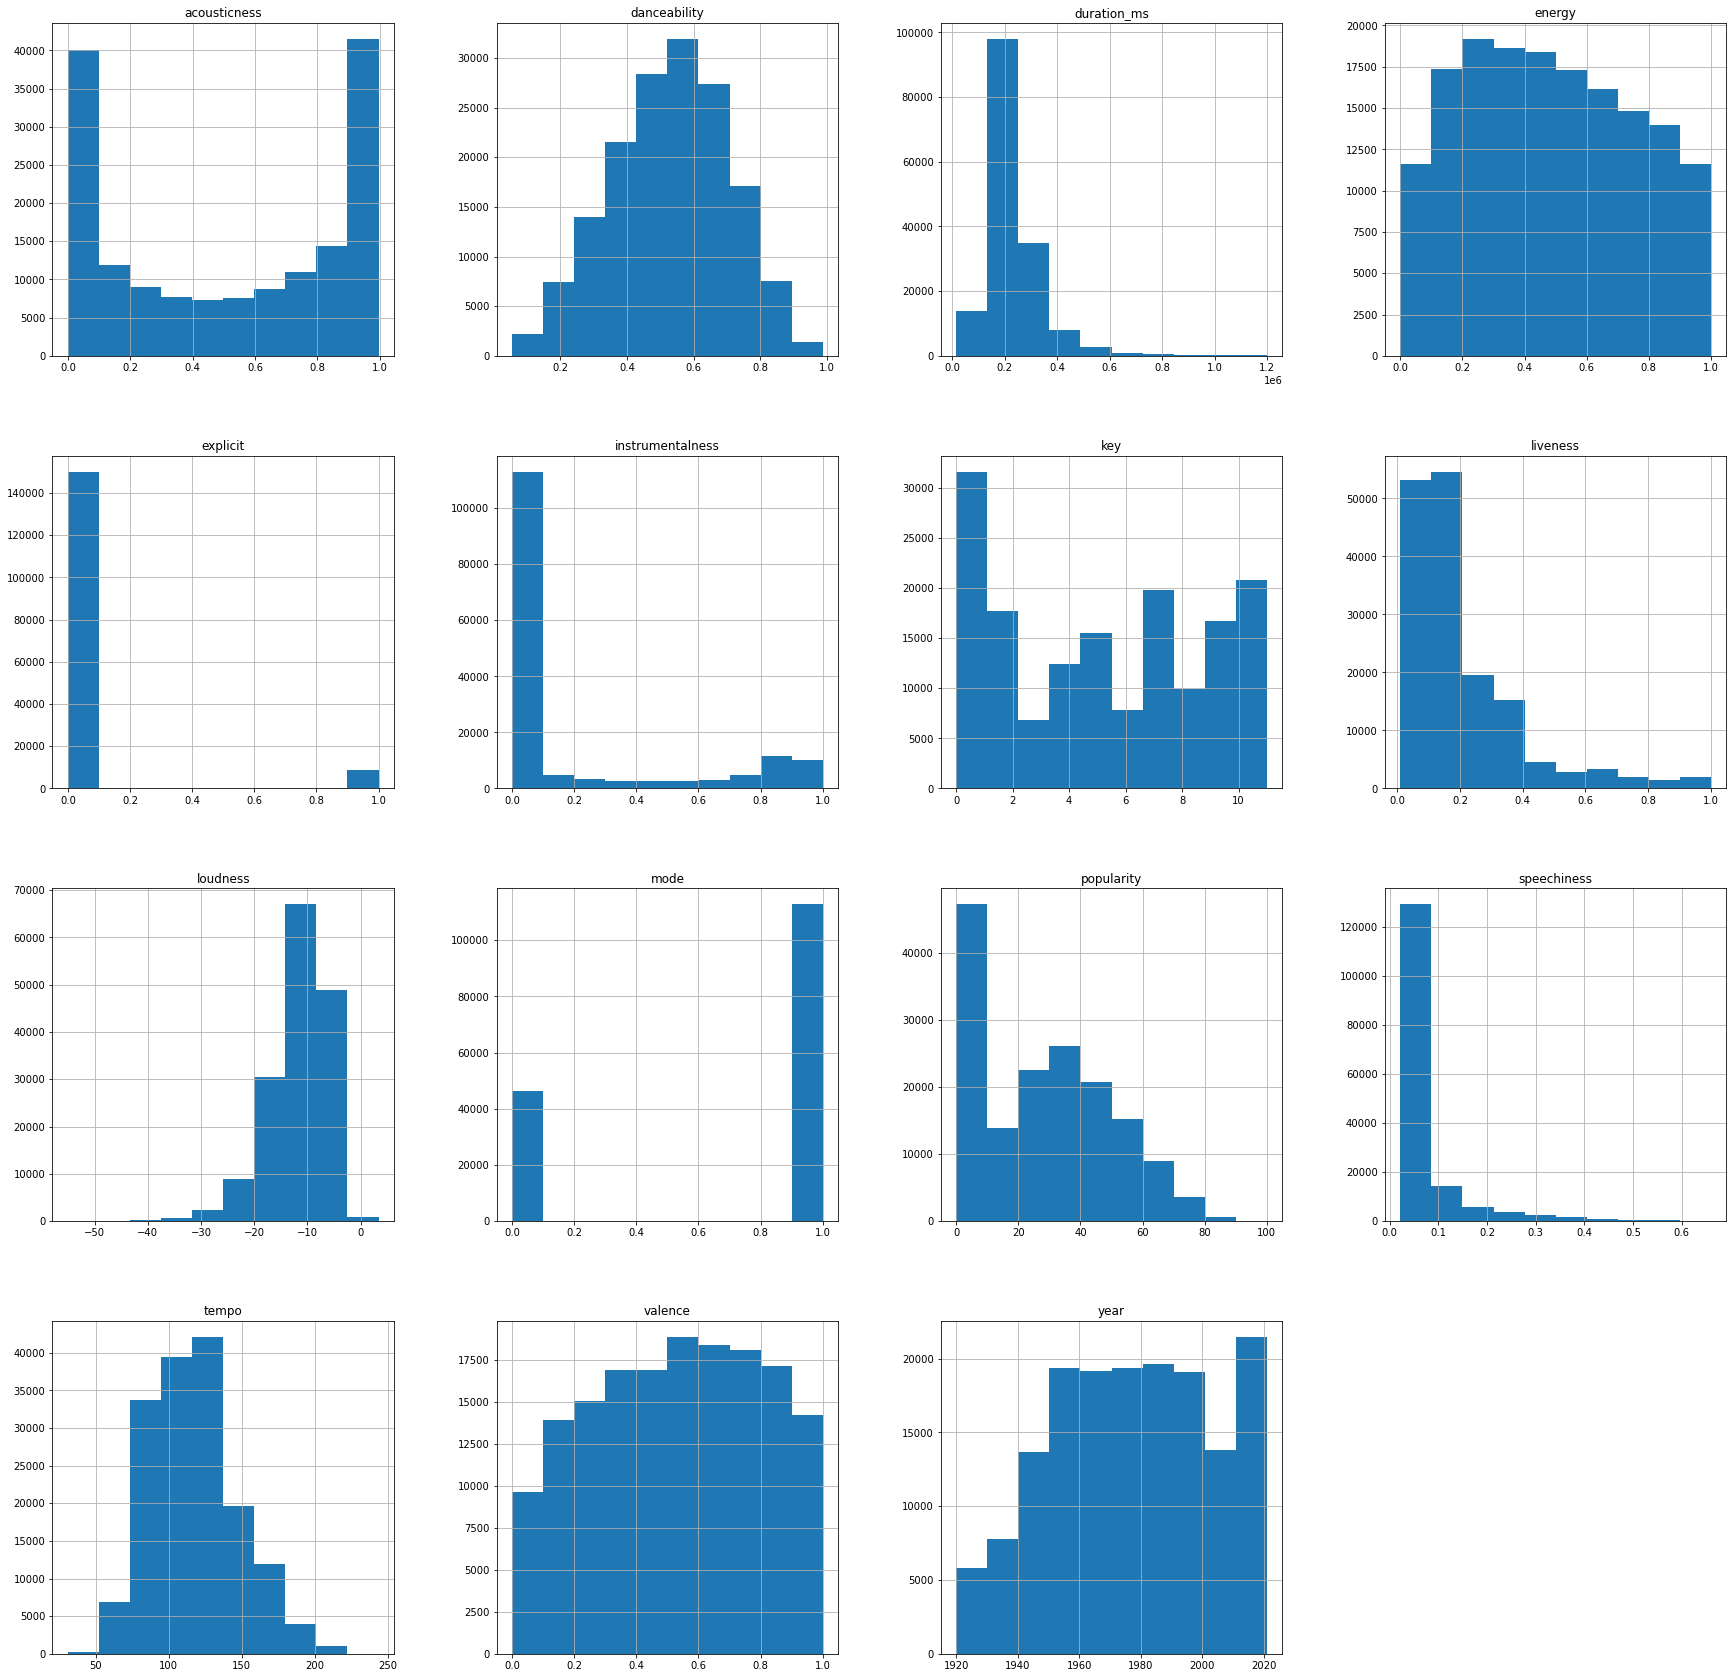

In [41]:
profile = ProfileReport(df_cleaned_tempo, title='Pandas Profiling Report nach Cleanen', explorative=True)
profile.to_file("Report_Features_nach_Cleanen.html")
df_cleaned_tempo.hist(figsize=(30, 30))

In [30]:
df_cleaned_tempo.to_csv('data_cleaned.csv', index=False)

## Im zweiten Abschnitt wird der Einfluss der Features auf die Popularität Untersucht:

In [2]:
df = pd.read_csv('data_cleaned.csv')

In [3]:
df.sort_values(by='popularity',ascending=False).head(30)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
18837,0.72100,['Olivia Rodrigo'],0.585,242014,0.436,1,7lPN2DXiMsVn7XUKtOW1CS,0.000013,10,0.1050,-8.761,1,drivers license,100,2021-01-08,0.0601,143.874,0.1320,2021
18659,0.22100,"['24kGoldn', 'iann dior']",0.700,140526,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),96,2020-07-24,0.0369,90.989,0.7560,2020
18662,0.46800,['Ariana Grande'],0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015,0.6820,2020
18754,0.21200,['KAROL G'],0.863,178947,0.666,1,7vrJn5hDSXRmdXoR30KgF1,0.000493,1,0.1030,-4.158,0,BICHOTA,95,2020-10-23,0.1520,163.908,0.8380,2020
18676,0.40100,"['Bad Bunny', 'Jhay Cortez']",0.731,205090,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,DÁKITI,95,2020-10-30,0.0544,109.928,0.1450,2020
18664,0.19000,['CJ'],0.711,123429,0.598,1,5vGLcdRuSbUhD8ScwsGSdA,0.000000,3,0.1500,-7.621,0,Whoopty,94,2020-08-20,0.1820,140.175,0.7370,2020
18669,0.21800,['Billie Eilish'],0.889,174321,0.340,0,54bFM56PmE4YLRnqpW6Tha,0.130000,11,0.0550,-7.773,0,Therefore I Am,94,2020-11-12,0.0697,94.009,0.7160,2020
18708,0.03030,"['Bad Bunny', 'ROSALÍA']",0.856,203201,0.618,0,2XIc1pqjXV3Cr2BQUGNBck,0.000000,7,0.0866,-4.892,1,LA NOCHE DE ANOCHE,94,2020-11-27,0.2860,81.993,0.3910,2020
18663,0.23700,['Ariana Grande'],0.830,173711,0.585,1,6Im9k8u9iIzKMrmV7BWtlF,0.000000,0,0.2480,-6.476,1,34+35,94,2020-10-30,0.0940,109.978,0.4850,2020
18666,0.21300,['The Kid LAROI'],0.662,161385,0.413,1,27OeeYzk6klgBh83TSvGMA,0.000000,0,0.1340,-7.357,1,WITHOUT YOU,94,2020-11-06,0.0299,93.005,0.4670,2020


In [4]:
# Korrelationsmatrix eher unübersichtlich, daher wird eine grafische Lösung bevorzugt
df.corr()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.264922,-0.134023,-0.769977,-0.225488,0.261192,-0.029145,-0.034051,-0.574272,0.055584,-0.456549,-0.068090,-0.218834,-0.173095,-0.639416
danceability,-0.264922,1.000000,-0.110511,0.242880,0.183463,-0.214388,0.026470,-0.120664,0.310276,-0.041951,0.183893,0.226100,0.006361,0.554366,0.206830
duration_ms,-0.134023,-0.110511,1.000000,0.056699,0.000978,0.108521,-0.004432,0.034739,-0.012451,-0.063678,0.041047,-0.057020,-0.017093,-0.220646,0.114869
energy,-0.769977,0.242880,0.056699,1.000000,0.182987,-0.236988,0.035594,0.146104,0.775112,-0.051844,0.344077,0.111990,0.256624,0.349960,0.510042
explicit,-0.225488,0.183463,0.000978,0.182987,1.000000,-0.113176,0.011289,0.015119,0.196639,-0.066746,0.248980,0.359395,0.018650,-0.020244,0.268064
instrumentalness,0.261192,-0.214388,0.108521,-0.236988,-0.113176,1.000000,-0.008800,-0.041899,-0.390501,-0.054464,-0.325521,-0.069297,-0.086428,-0.211382,-0.194745
key,-0.029145,0.026470,-0.004432,0.035594,0.011289,-0.008800,1.000000,-0.007584,0.023857,-0.108194,0.002734,0.024170,0.005638,0.027791,0.018308
liveness,-0.034051,-0.120664,0.034739,0.146104,0.015119,-0.041899,-0.007584,1.000000,0.084292,0.006048,-0.071391,0.114618,0.014603,-0.002859,-0.004152
loudness,-0.574272,0.310276,-0.012451,0.775112,0.196639,-0.390501,0.023857,0.084292,1.000000,-0.018251,0.323489,0.090360,0.203358,0.324521,0.418250
mode,0.055584,-0.041951,-0.063678,-0.051844,-0.066746,-0.054464,-0.108194,0.006048,-0.018251,1.000000,-0.005304,-0.058406,0.005275,0.022207,-0.046443


In [92]:
# Reihenfolge der Spalten verändern, sodass popularity vorne ist.
cols = df.corr().columns.tolist()
cols = cols[10:] + cols[:10]
cols

['popularity',
 'speechiness',
 'tempo',
 'valence',
 'year',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode']

In [93]:
df_bearbeitet = df[cols]

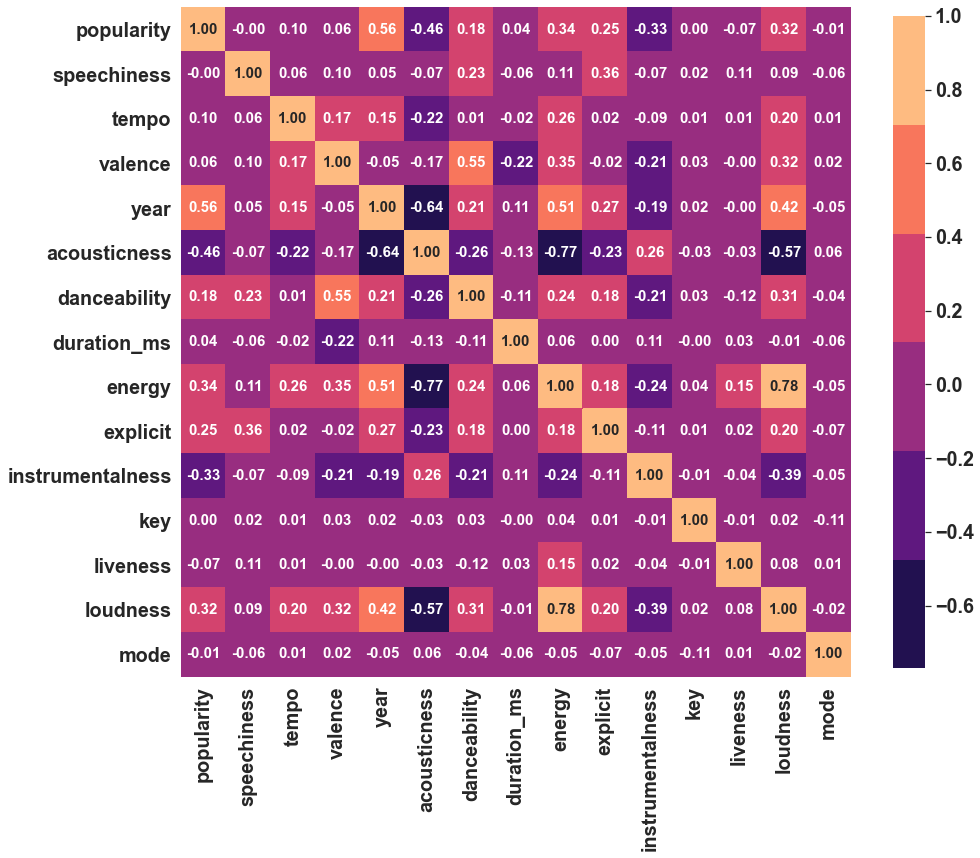

In [94]:
# Grafische Aufbereitung der Korrelationen 
corr = df_bearbeitet.corr()
fig, ax = plt.subplots(figsize=(15, 15))
plt.rcParams.update({'font.weight': 600})
cmap = sns.color_palette("magma")
sns.set(font_scale=1.8) 
sns_plot=sns.heatmap(corr, cmap=cmap, square=True, annot=True, annot_kws={"size": 15},fmt='.2f', cbar=True, cbar_kws={"shrink": .80})
plt.savefig('Korrelationsmatrix_features.pdf',bbox_inches='tight',transparent=True)
plt.show()

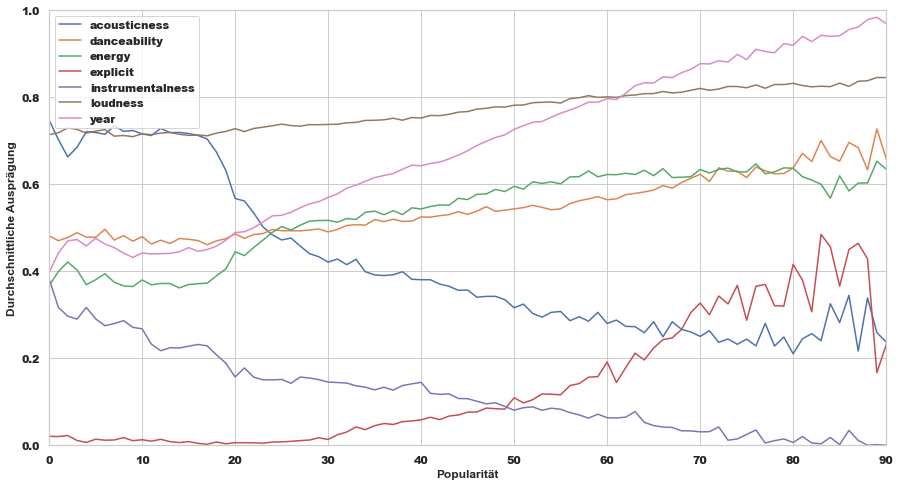

In [14]:
# Genauererer Verlauf der Features zur Popularität
# Standardisierung der Daten zwischen 0-1 um vergleich in einem Plot zu ermöglichen
from sklearn import preprocessing
columns = ["acousticness","danceability","energy","explicit","instrumentalness","loudness","year"]
x = df[columns].values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled,columns= columns)
data['popularity'] = df['popularity']


fig, ax = plt.subplots(figsize=(15, 8))
plt.rcParams.update({'font.weight': 1000})
#sns.set(style="whitegrid")
for col in columns:
    x = data.groupby("popularity")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col) #sizes="x-large"
#ax.set_title('Features to popularity')
ax.set_ylabel('Durchschnittliche Ausprägung',fontdict=dict(weight='bold'))
ax.set_xlabel('Popularität',fontdict=dict(weight='bold'))
ax.set_xlim(0,90)
ax.set_ylim(0,1)
ax.legend(loc="upper left") # bbox_to_anchor=(0.6,0.5)
sns.set(style="whitegrid", font_scale=1.2)
plt.savefig('features_popularity.pdf',bbox_inches='tight',transparent=True)

In [ ]:
# Anzahl an Tracks mit einer Popularität von über 90
(df['popularity']>90).sum()

(0.0, 90.0)

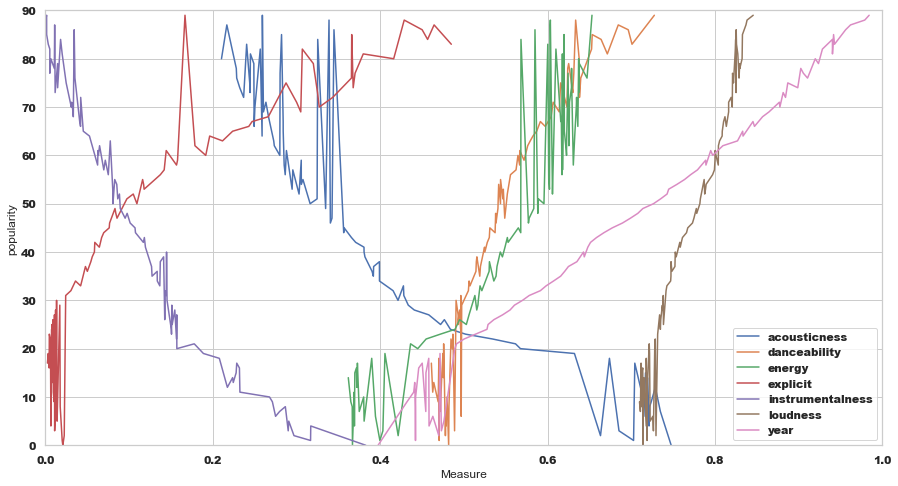

In [13]:
# Interessanter Ansatz, um ggf einen Sweat Spot in den einzelnen Features zu sehen. 
#Allerdings ist der Plot nicht sehr aussagekräftig und wird daher nicht in der Arbeit verwendet
from sklearn import preprocessing
columns = ["acousticness","danceability","energy","explicit","instrumentalness","loudness","year"]
x = df[columns].values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled,columns= columns)
data['popularity'] = df['popularity']
data = data[data['popularity']<90]
plt_plot = plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")
for col in columns:
    x = data.groupby("popularity")[col].mean()
    ax= sns.lineplot(x=x,y=x.index,label=col)
#ax.set_title('Features to popularity')
ax.set_xlabel('Measure')
ax.set_ylabel('popularity')
ax.set_xlim(0,1)
ax.set_ylim(0,90)

In [9]:
from sklearn import preprocessing
columns = ["acousticness","instrumentalness","explicit","loudness","popularity"]
x = df[columns].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled,columns= columns)

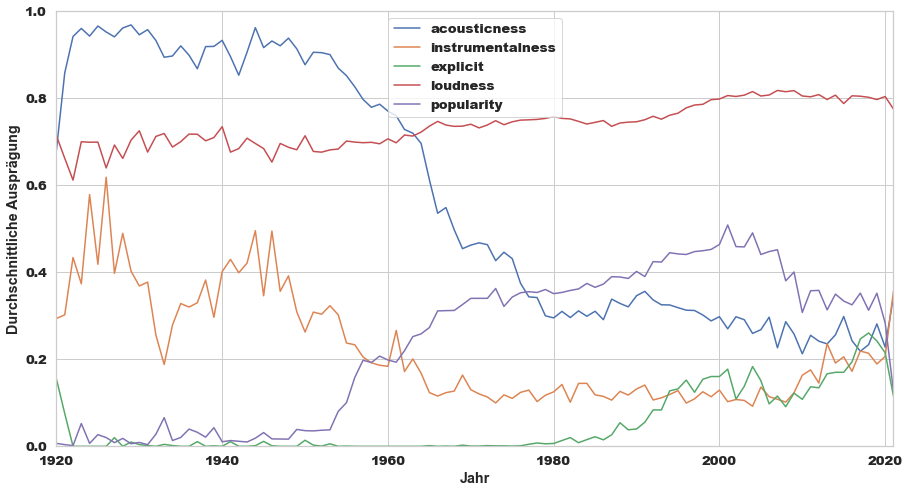

In [10]:
data['year'] = df['year']
fig, ax = plt.subplots(figsize=(15, 8))
#sns.set(style="whitegrid")

for col in columns:
    x = data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
#ax.set_title('Features im lauf der Jahre')
ax.set_ylabel('Durchschnittliche Ausprägung',fontdict=dict(weight='bold'))
ax.set_xlabel('Jahr',fontdict=dict(weight='bold'))
ax.set_xlim(1920,2021)
ax.set_ylim(0,1)
ax.legend(loc="upper center") # bbox_to_anchor=(0.6,0.5)
sns.set(style="whitegrid", font_scale=1.2)
plt.savefig('features_year_neu.pdf',bbox_inches='tight',transparent=True)

In [67]:
plt_plot.savefig('features_year_neu.pdf')

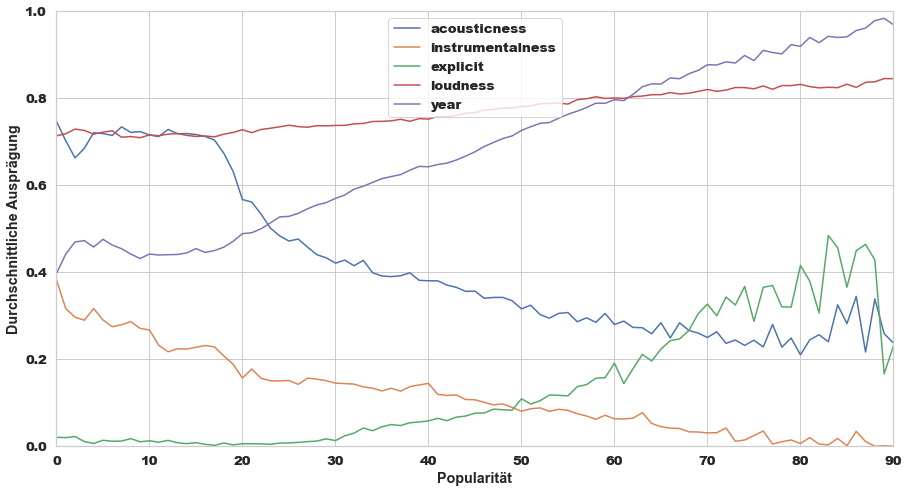

In [18]:
data['popularity'] = df['popularity']
fig, ax = plt.subplots(figsize=(15, 8))
#sns.set(style="whitegrid")
columns = ["acousticness","instrumentalness","explicit","loudness","year"]
for col in columns:
    x = data.groupby("popularity")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
#ax.set_title('Features im lauf der Jahre')
ax.set_ylabel('Durchschnittliche Ausprägung',fontdict=dict(weight='bold'))
ax.set_xlabel('Popularität',fontdict=dict(weight='bold'))
ax.set_xlim(0,90)
ax.set_ylim(0,1)
ax.legend(loc="upper center") # bbox_to_anchor=(0.6,0.5)
sns.set(style="whitegrid", font_scale=1.2)
plt.savefig('features_popularity.pdf',bbox_inches='tight',transparent=True)